## Required Packages

In [ ]:
#!pip install mtcnn
#!pip install facenet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.7 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
#from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
import os
import mtcnn
from PIL import Image
import numpy as np
from numpy import dot
from numpy.linalg import norm
import math

## Test data

In [ ]:
# test 할 데이터 불러오기
print(os.listdir("/content/drive/MyDrive/딥러닝"))
image_list = os.listdir("/content/drive/MyDrive/딥러닝")

['이영지1.jpg', '차은우1.jpg', '이영지2.png', '차은우2.jpg', '차은우3.jpg', '이영지3.jpeg', '박나래1.jpg', '이영지4.jpg', '차은우4.jpg', '이영지5.jpg', '차은우5.jpg', '박나래2.jpeg', '이영지6.jpg', '이영지7.jpg', '이영지8.jpg', '박나래3.jpeg', '차은우6.jpg', '아이유1.jpg', '이영지9.jpg', '이영지10.jpg', '차은우7.jpg', '아이유2.jpg', '차은우8.jpg', '박나래4.jpeg', '아이유3.jpg', '이영지11.jpg', '차은우9.jpg', '박나래5.jpeg', '이영지12.jpg', '차은우10.jpg', '아이유4.jpg', '박나래6.jpeg', '차은우11.jpg', '차은우12.jpg', '박나래7.jpeg', '차은우13.jpg', '박나래8.jpeg', '차은우14.jpg', '박나래9.jpeg', '이영지13.jpg', '박나래10.jpeg', '박나래11.jpeg', '아이유5.jpg', '이영지14.jpg', '박나래12.jpeg', '차은우16.jpg', '박나래13.jpeg', '차은우17.jpg', '아이유7.jpg', '박나래14.jpeg', '박나래15.jpeg', '차은우18.jpg', '박나래16.jpeg', '이영지15.jpg', '아이유6.jpg', '박나래17.jpeg', '차은우19.jpg', '이영지16.jpg', '차은우20.jpg', '아이유8.jpg', '박ᄂ

In [ ]:
image_list.sort()

In [ ]:
print(image_list)

['박나래1.jpg', '박나래10.jpeg', '박나래11.jpeg', '박나래12.jpeg', '박나래13.jpeg', '박나래14.jpeg', '박나래15.jpeg', '박나래16.jpeg', '박나래17.jpeg', '박나래18.jpeg', '박나래19.jpeg', '박나래2.jpeg', '박나래20.jpeg', '박나래3.jpeg', '박나래4.jpeg', '박나래5.jpeg', '박나래6.jpeg', '박나래7.jpeg', '박나래8.jpeg', '박나래9.jpeg', '아이유1.jpg', '아이유10.jpg', '아이유11.jpg', '아이유12.jpg', '아이유13.jpg', '아이유14.jpg', '아이유15.jpg', '아이유16.jpg', '아이유17.jpg', '아이유18.jpg', '아이유19.jpg', '아이유2.jpg', '아이유20.jpg', '아이유3.jpg', '아이유4.jpg', '아이유5.jpg', '아이유6.jpg', '아이유7.jpg', '아이유8.jpg', '아이유9.jpg', '이영지1.jpg', '이영지10.jpg', '이영지11.jpg', '이영지12.jpg', '이영지13.jpg', '이영지14.jpg', '이영지15.jpg', '이영지16.jpg', '이영지17.jpg', '이영지18.jpg', '이영지19.jpg', '이영지2.png', '이영지20.jpg', '이영지3.jpeg', '이영지4.jpg', '이영지5.jpg', '이영지6.jpg', '이영지7.jpg', '이영지8.jpg', '이영지9.jpg', '제니1

In [ ]:
#image_list label : 실제 label
name = ['박나래','아이유','이영지','제니','차은우']
image_list_label = []
for i in name:
  for j in range(20):
    image_list_label.append(i)
len(image_list_label)

100

In [ ]:
# 기준 얼굴 데이터
print(os.listdir("/content/drive/MyDrive/기준얼굴"))
standard_list = os.listdir("/content/drive/MyDrive/기준얼굴")

['제니.jpg', '박나래.jpg', '차은우.jpg', '아이유.jpg', '이영지.jpg']


## Model

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1

In [ ]:
# For a model pretrained on VGGFace2
#https://morioh.com/p/d76280ae199a
mtcnn = MTCNN(margin=10, select_largest=False, post_process=False, device='cuda:0')
model = InceptionResnetV1(pretrained='vggface2').eval()

### inference

In [ ]:
img = Image.open("/content/drive/MyDrive/딥러닝/"+image_list[0])

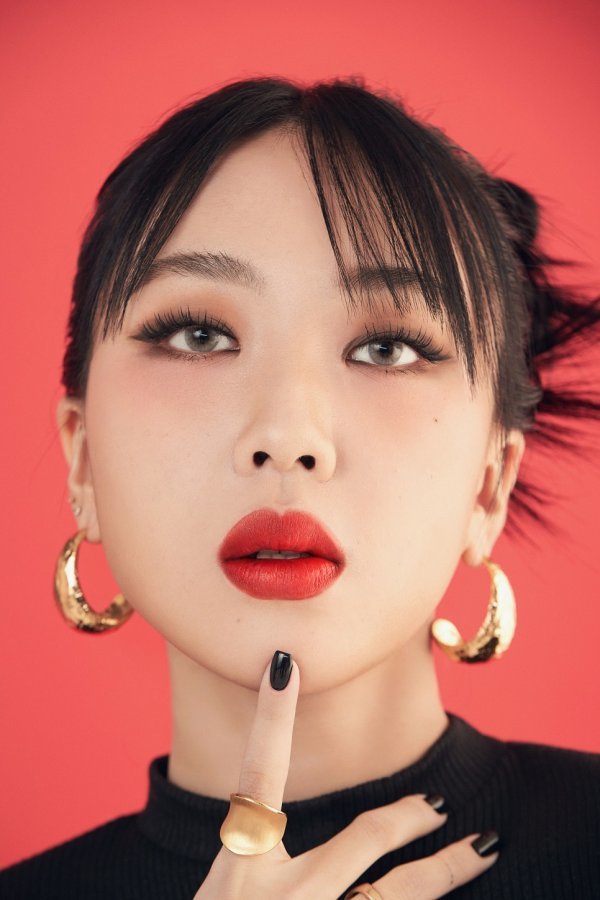

In [ ]:
img

In [ ]:
img_cropped = mtcnn(img)

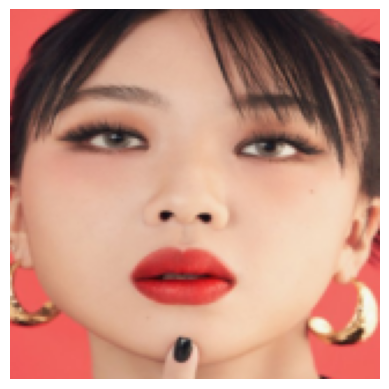

In [ ]:
# Visualize
plt.imshow(img_cropped.permute(1, 2, 0).int().numpy())
plt.axis('off');

In [ ]:
img_embedding = model(img_cropped.unsqueeze(0))

In [ ]:
img_embedding

# extract_face_feature using Cosine Sim

In [ ]:
def extract_face_feature(path):
  img =  Image.open(path)
  img_cropped = mtcnn(img)
  img_embedding = model(img_cropped.unsqueeze(0))
  return img_embedding

In [ ]:
#기준 얼굴 feature vector 생성
standard_dic = []
standard_name=[]
for i in standard_list:
  path = '/content/drive/MyDrive/기준얼굴/'+i
  emd = extract_face_feature(path)
  standard_dic.append(emd)
  standard_name.append(i[:-4])

In [ ]:
#label
standard_name

['제니', '박나래', '차은우', '아이유', '이영지']

In [ ]:
#유사도 정의 함수
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [ ]:
#모든 파일 feature vector 생성
test_file = []
for i in image_list:
  path = '/content/drive/MyDrive/딥러닝/'+i
  emd = extract_face_feature(path)
  test_file.append(emd)

In [ ]:
#cosine similarity
predict_label = []
for i in range(len(test_file)):
  test_similarity = []
  #각 기준파일과의 cosine similarity 계산 => 유사도가 가장 높은 이미지를 label로 사용
  for j in range(len(standard_dic)):
    sim = cos_sim(test_file[i][0].detach().cpu().numpy(), standard_dic[j][0].detach().cpu().numpy())
    test_similarity.append(sim)
  max_index = test_similarity.index(max(test_similarity))
  max_name = standard_name[max_index]
  predict_label.append(max_name)

In [ ]:
import unicodedata
num = 0
for i in range(100):
  #분리된 자음 모음 결합하는 코드
  label_predict = unicodedata.normalize('NFC',predict_label[i])
  label_actual = unicodedata.normalize('NFC',image_list_label[i])
  if label_predict == label_actual:
     num+=1

print("Accuracy: ", num/100)

Accuracy:  0.29


# extract_face_feature using euclidean

In [ ]:
#cosine similarity
predict_label = []
for i in range(len(test_file)):
  test_similarity = []
  #각 기준파일과의 cosine similarity 계산 => 유사도가 가장 높은 이미지를 label로 사용
  for j in range(len(standard_dic)):
    sim = math.dist(test_file[i][0].detach().cpu().numpy(), standard_dic[j][0].detach().cpu().numpy())
    test_similarity.append(sim)
  max_index = test_similarity.index(max(test_similarity))
  max_name = standard_name[max_index]
  predict_label.append(max_name)

In [ ]:
import unicodedata
num = 0
for i in range(100):
  #분리된 자음 모음 결합하는 코드
  label_predict = unicodedata.normalize('NFC',predict_label[i])
  label_actual = unicodedata.normalize('NFC',image_list_label[i])
  if label_predict == label_actual:
     num+=1

print("Accuracy: ", num/100)

Accuracy:  0.14
